In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [180]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Task3\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data analysis and Visualisation

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(147, 5)

In [8]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.sepal_length.min()

4.3

In [16]:
df.sepal_length.max()

7.9

In [17]:
df.sepal_width.min()

2.0

In [19]:
df.sepal_width.max()

4.4

In [ ]:
df.sepal_length.min()

1.0

In [21]:
df.petal_length.max()

6.9

In [22]:
df.petal_width.min()

0.1

In [23]:
df.petal_width.max()

2.5

In [31]:
df.species.value_counts().reset_index()

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


In [25]:
df.sepal_length.nunique()/df.shape[0]*100

23.809523809523807

In [26]:
df.sepal_width.nunique()/df.shape[0]*100

15.646258503401361

In [27]:
df.petal_length.nunique()/df.shape[0]*100

29.25170068027211

In [28]:
df.petal_width.nunique()/df.shape[0]*100

14.965986394557824

In [29]:
df.species.value_counts(normalize=True)*100

species
Iris-versicolor    34.013605
Iris-virginica     33.333333
Iris-setosa        32.653061
Name: proportion, dtype: float64

<Axes: xlabel='sepal_length'>

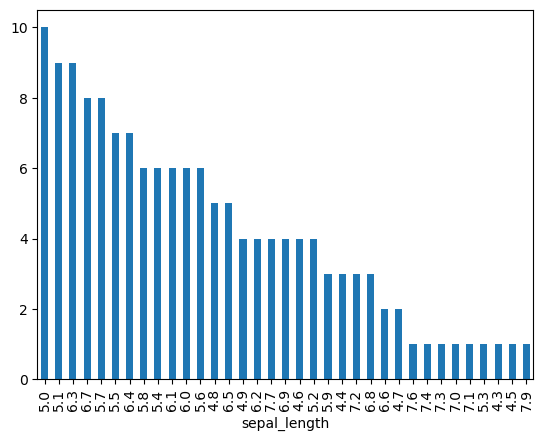

In [65]:
df.sepal_length.value_counts().plot(kind='bar')

<Axes: xlabel='sepal_width'>

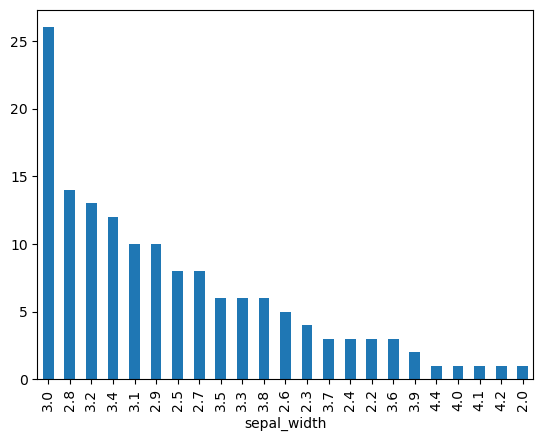

In [66]:
df.sepal_width.value_counts().plot(kind='bar')

<Axes: xlabel='petal_length'>

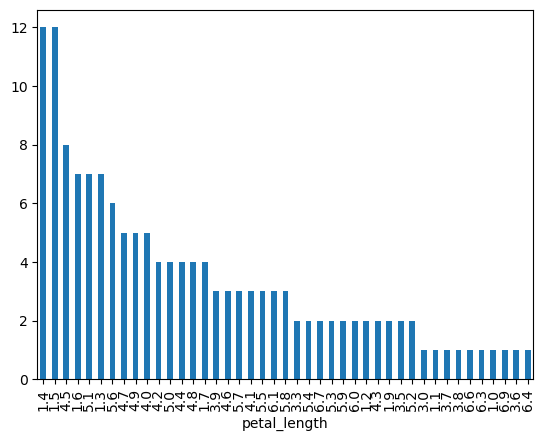

In [67]:
df.petal_length.value_counts().plot(kind='bar')

<Axes: xlabel='petal_width'>

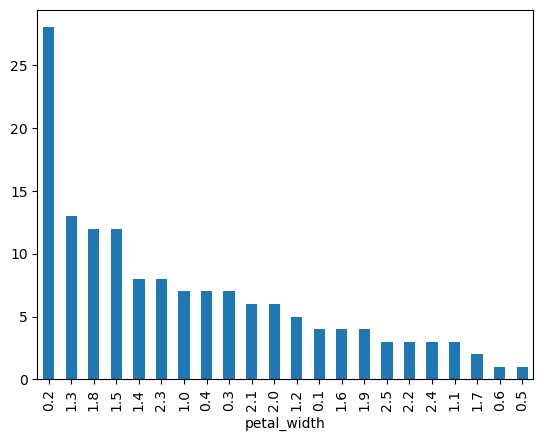

In [68]:
df.petal_width.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'iris')

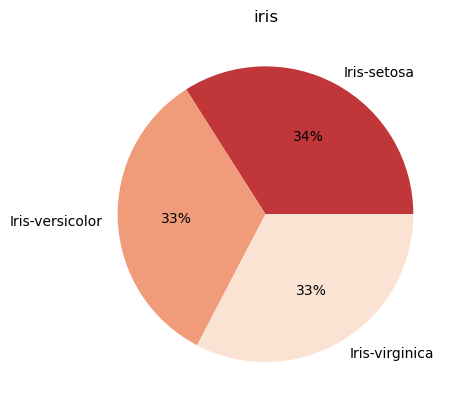

In [38]:
color = sns.color_palette('RdBu')
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.f%%',colors=color)
plt.title("iris")

In [36]:
df.groupby('species')['sepal_length'].mean()  

species
Iris-setosa        5.010417
Iris-versicolor    5.936000
Iris-virginica     6.604082
Name: sepal_length, dtype: float64

<Axes: xlabel='species'>

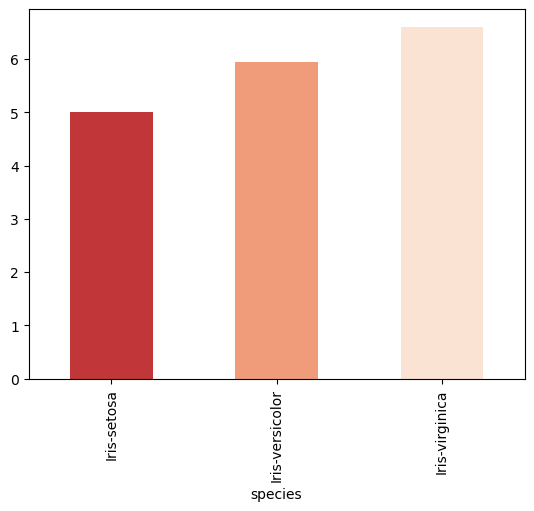

In [37]:
color = sns.color_palette('RdBu')
df.groupby('species')['sepal_length'].mean().plot(kind='bar',color=color)

In [39]:
df.groupby('species')['sepal_width'].mean()

species
Iris-setosa        3.431250
Iris-versicolor    2.770000
Iris-virginica     2.979592
Name: sepal_width, dtype: float64

<Axes: xlabel='species'>

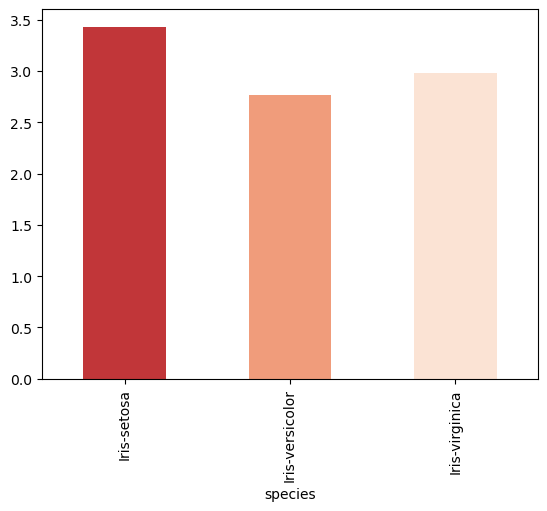

In [40]:
color = sns.color_palette('RdBu')
df.groupby('species')['sepal_width'].mean().plot(kind='bar', color=color)

In [42]:
df.groupby('species')['petal_length'].mean()

species
Iris-setosa        1.462500
Iris-versicolor    4.260000
Iris-virginica     5.561224
Name: petal_length, dtype: float64

<Axes: xlabel='species'>

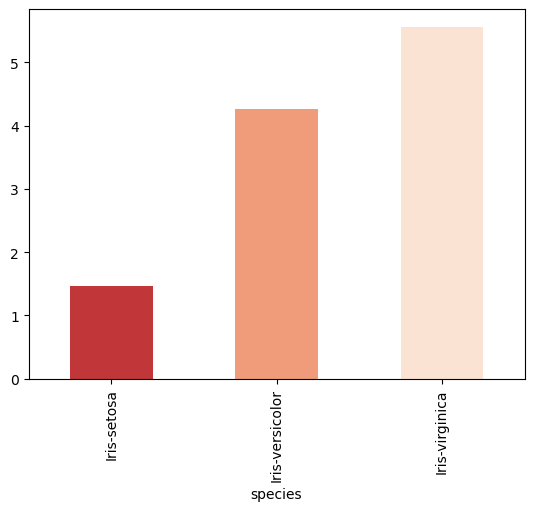

In [44]:
color = sns.color_palette('RdBu')
df.groupby('species')['petal_length'].mean().plot(kind='bar',color=color)

In [45]:
df.groupby('species')['petal_width'].mean()

species
Iris-setosa        0.250000
Iris-versicolor    1.326000
Iris-virginica     2.028571
Name: petal_width, dtype: float64

<Axes: xlabel='species'>

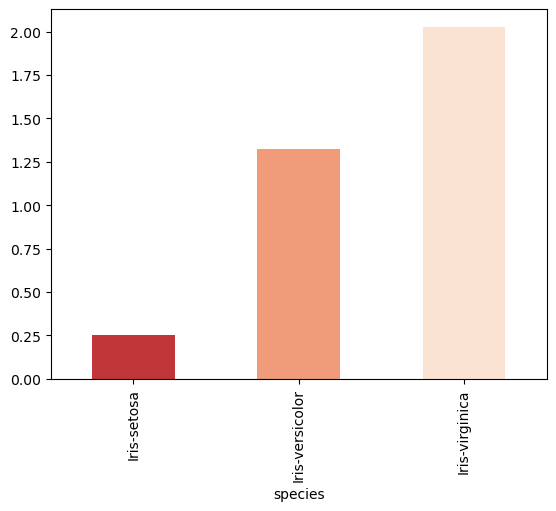

In [46]:
color = sns.color_palette('RdBu')
df.groupby('species')['petal_width'].mean().plot(kind='bar',color=color)

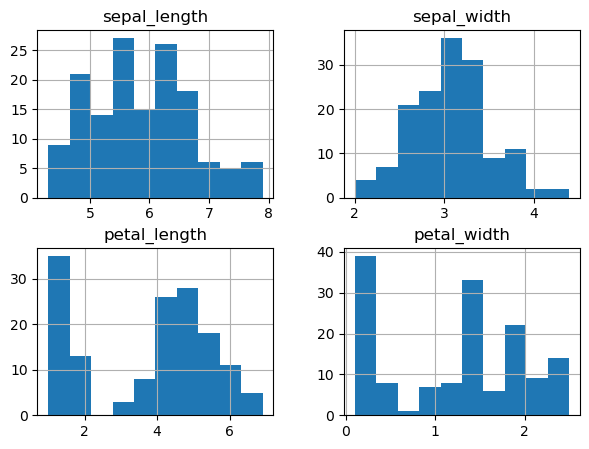

In [ ]:
df.hist(figsize=(7,5))
plt.show()

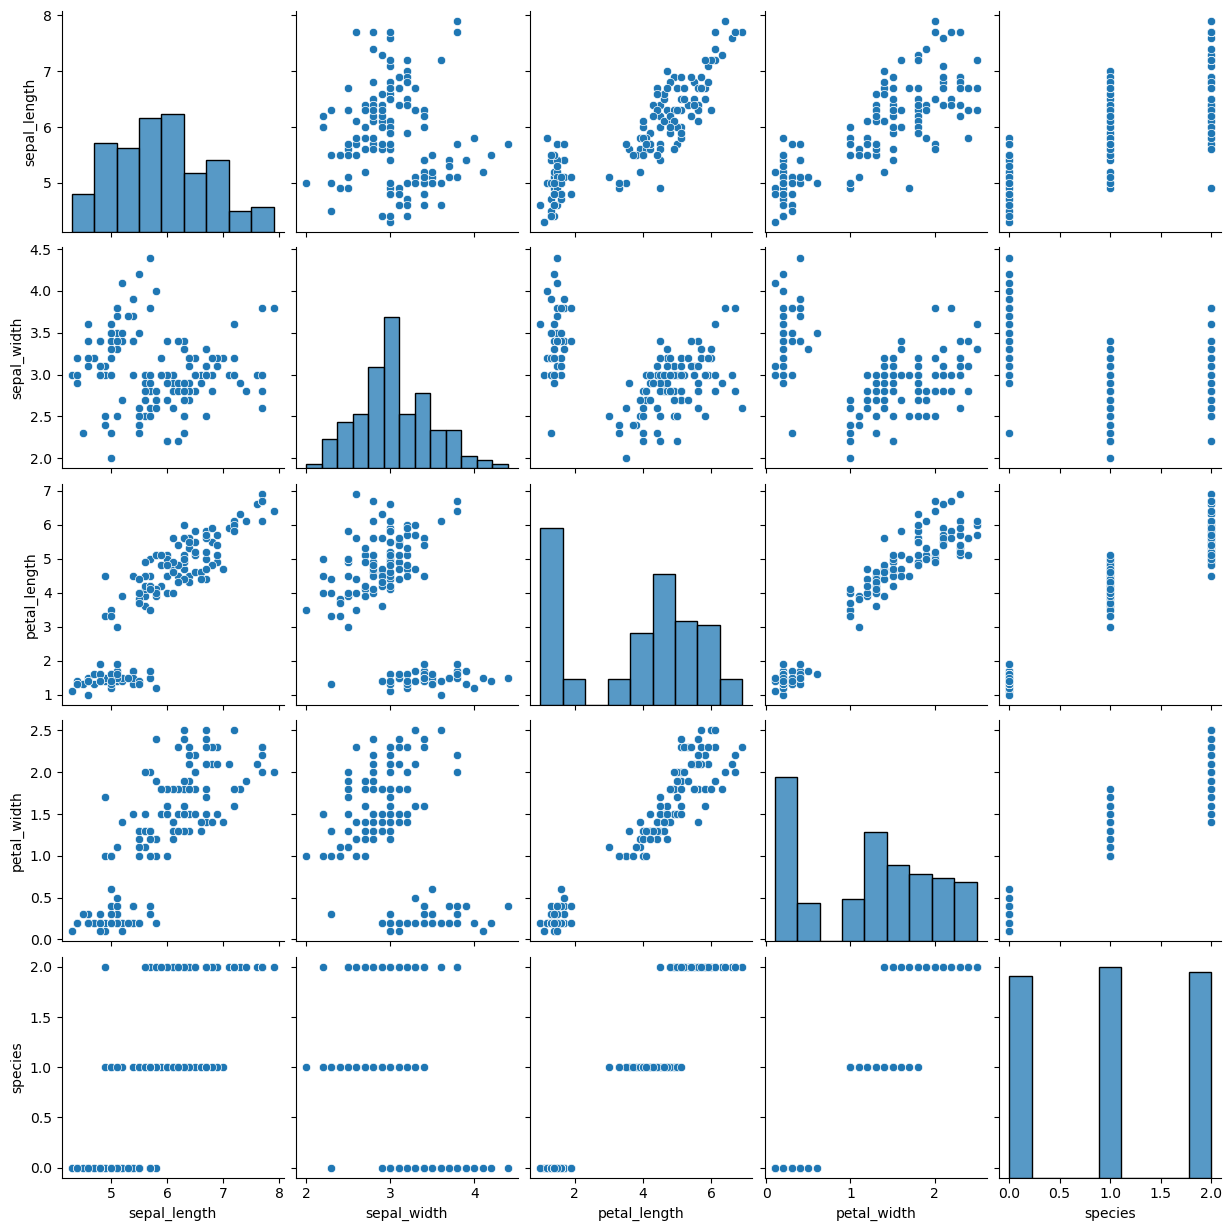

In [178]:
sns.pairplot(df);
plt.show()

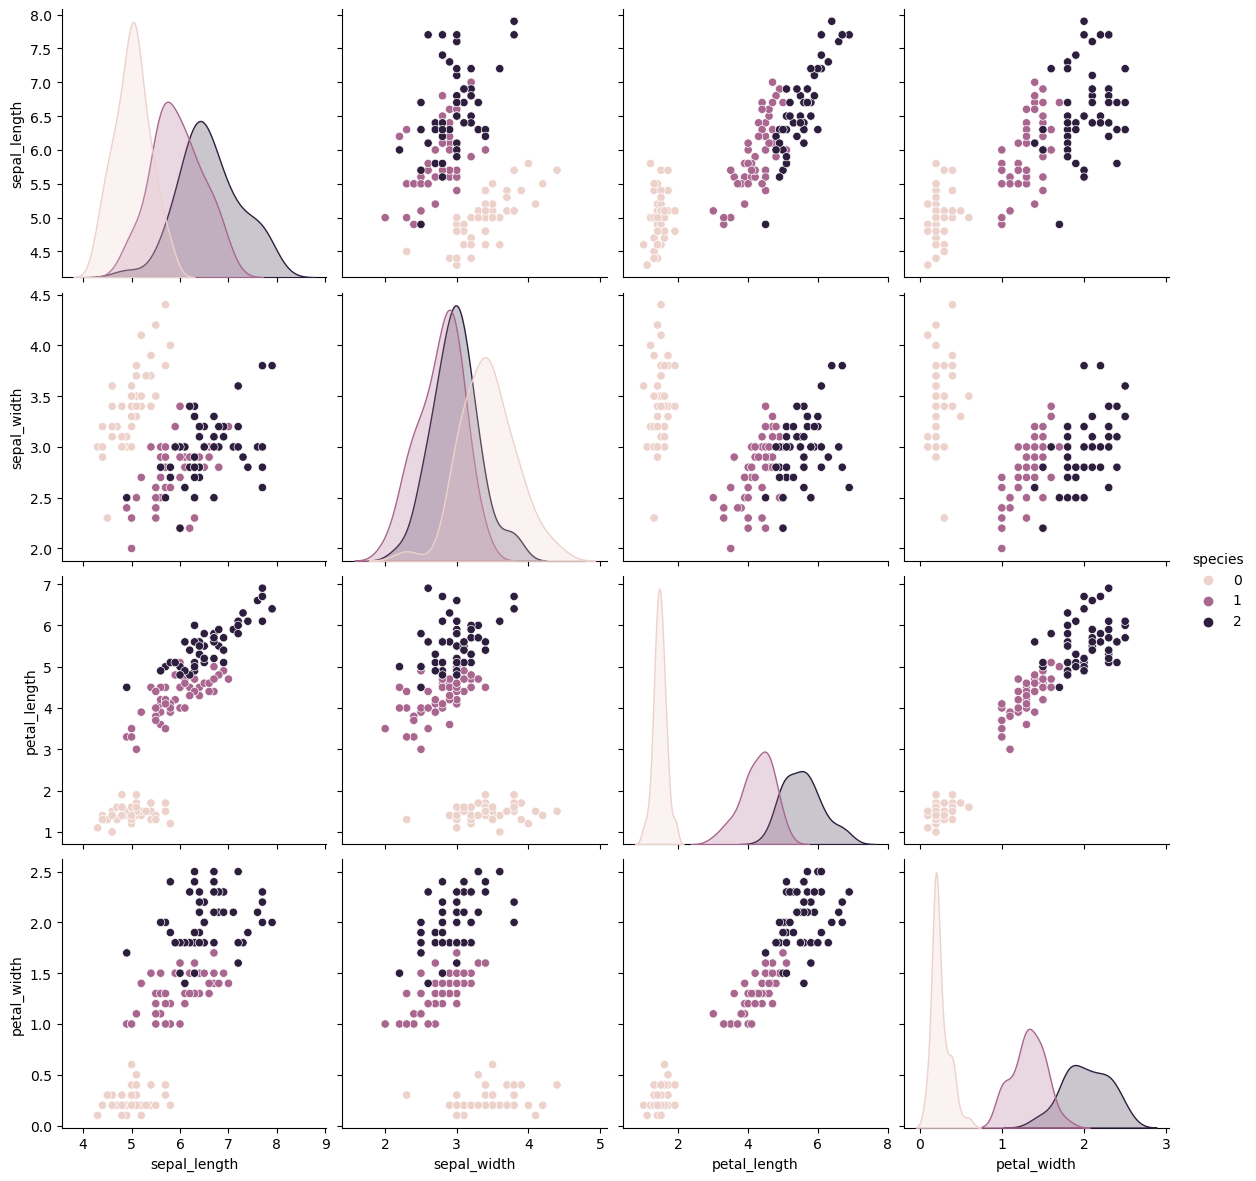

In [177]:
sns.pairplot(df,hue="species",size=3);
plt.show()

In [51]:
import plotly.express as px
figg = px.histogram(data_frame=df, x='species', title='total no of species', color='species')

figg.show()

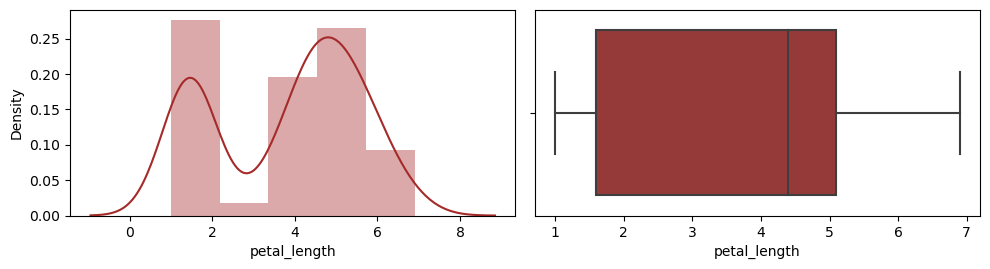

In [60]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['petal_length'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['petal_length'],color='brown')

plt.tight_layout()
plt.show()

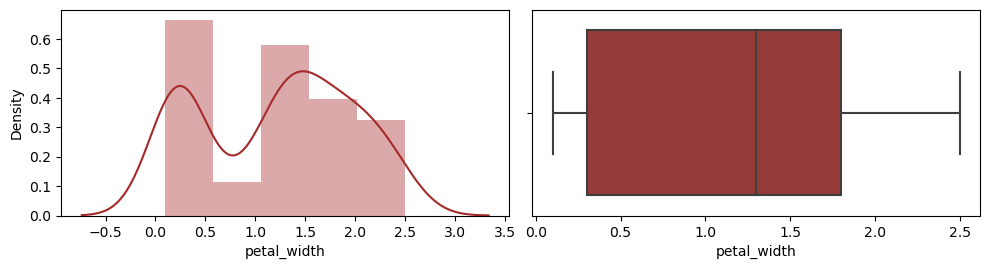

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['petal_width'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['petal_width'],color='brown')

plt.tight_layout()
plt.show()

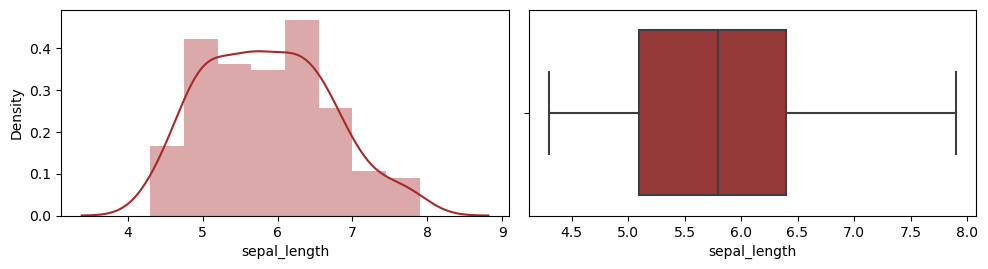

In [58]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['sepal_length'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['sepal_length'],color="brown")

plt.tight_layout()
plt.show()

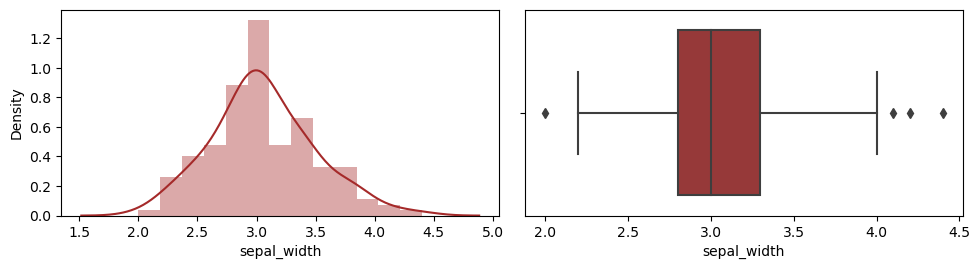

In [61]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['sepal_width'],color='brown')

plt.subplot(2,2,2)
sns.boxplot(x=df['sepal_width'],color='brown')

plt.tight_layout()
plt.show()

 # Encoding

In [72]:
le =LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
110,6.5,3.2,5.1,2.0,2
5,5.4,3.9,1.7,0.4,0
103,6.3,2.9,5.6,1.8,2
48,5.3,3.7,1.5,0.2,0
21,5.1,3.7,1.5,0.4,0
14,5.8,4.0,1.2,0.2,0
30,4.8,3.1,1.6,0.2,0
32,5.2,4.1,1.5,0.1,0
27,5.2,3.5,1.5,0.2,0
66,5.6,3.0,4.5,1.5,1


# Modeling

In [74]:
x=df.drop(columns='species',axis=1)
y=df.species

In [75]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

# Logistic regression

In [87]:
model_lg=LogisticRegression(C=1,max_iter=100,multi_class='multinomial',solver='saga')
model_lg.fit(x_train,y_train)

LogisticRegression(C=1, multi_class='multinomial', solver='saga')

In [88]:
model_lg.score(x_train,y_train)

0.9829059829059829

In [89]:
model_lg.score(x_test,y_test)

1.0

# Random Forest

In [123]:
rfc=RandomForestClassifier(n_estimators=70)
model=rfc.fit(x_train,y_train)

In [120]:
model.score(x_train,y_train)

1.0

In [124]:
model.score(x_test,y_test)

0.9666666666666667

# XGBOOST

In [166]:
model_XG = xgb.XGBClassifier(n_estimators=300)
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [164]:
model_XG.score(x_train,y_train)

1.0

In [170]:
model_XG.score(x_test,y_test)

0.9333333333333333

# SVM

In [172]:
svc=SVC(class_weight='balanced')
svc.fit(x_train,y_train)

SVC(class_weight='balanced')

In [173]:
svc.score(x_train,y_train)

0.9829059829059829

In [174]:
svc.score(x_test,y_test)

0.9666666666666667